In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics

In [2]:
df = pd.read_csv('Digital Dataset.csv')
df

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6.0,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2.0,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11.0,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2.0,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6.0,6,8,4345,IsConfid,ToolConfid,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9371,9415,25,Female,91633,PPC,Consideration,2641.060983,0.206440,0.112952,30,2.561423,7.454520,79,14.0,6,0,3590,IsConfid,ToolConfid,1
9372,9821,46,Male,41961,Email,Conversion,692.013485,0.025042,0.090193,12,6.952444,9.087889,77,6.0,9,1,487,IsConfid,ToolConfid,1
9373,9102,28,Female,120873,PPC,Awareness,4116.534828,0.042139,0.059862,8,9.869860,6.257854,95,4.0,3,0,615,IsConfid,ToolConfid,0
9374,11851,61,Female,136849,Referral,Retention,5010.414158,0.210479,0.127194,32,4.043087,8.225071,66,19.0,7,5,3651,IsConfid,ToolConfid,1


In [5]:
df.shape

(9376, 20)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9376 entries, 0 to 9375
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           9376 non-null   int64  
 1   Age                  9376 non-null   int64  
 2   Gender               9376 non-null   object 
 3   Income               9376 non-null   int64  
 4   CampaignChannel      9376 non-null   object 
 5   CampaignType         9376 non-null   object 
 6   AdSpend              9227 non-null   float64
 7   ClickThroughRate     9376 non-null   float64
 8   ConversionRate       9376 non-null   float64
 9   WebsiteVisits        9376 non-null   int64  
 10  PagesPerVisit        9376 non-null   float64
 11  TimeOnSite           9151 non-null   float64
 12  SocialShares         9376 non-null   int64  
 13  EmailOpens           8961 non-null   float64
 14  EmailClicks          9376 non-null   int64  
 15  PreviousPurchases    9376 non-null   i

In [8]:
df.describe()

,CustomerID,Age,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion
count,9376.000000,9376.000000,9376.000000,9227.000000,9376.000000,9376.000000,9376.000000,9376.000000,9151.000000,9376.000000,8961.000000,9376.000000,9376.000000,9376.000000,9376.000000
mean,11997.373294,43.491254,84716.079565,5003.938383,0.154611,0.104728,24.708084,5.534942,7.739664,49.866894,9.496708,4.458191,4.469923,2495.421075,0.876706
std,2309.202518,14.882936,37570.008041,2844.242364,0.083984,0.054770,14.306183,2.606917,4.217728,28.971283,5.691160,2.861638,2.883470,1429.566819,0.328791
min,8000.000000,18.000000,20014.000000,100.054813,0.010005,0.010018,0.000000,1.000428,0.501669,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10002.750000,31.000000,52013.750000,2535.906738,0.082555,0.056927,12.000000,3.274597,4.094377,25.000000,5.000000,2.000000,2.000000,1256.750000,1.000000
50%,11989.500000,43.000000,84973.500000,5010.414158,0.154026,0.104703,25.000000,5.515385,7.682128,50.000000,9.000000,4.000000,4.000000,2500.000000,1.000000
75%,13997.250000,56.000000,116819.000000,7438.016716,0.228029,0.152161,37.000000,7.830607,11.473281,75.000000,14.000000,7.000000,7.000000,3708.000000,1.000000
max,15999.000000,69.000000,149986.000000,9997.914781,0.299968,0.199995,49.000000,9.999055,14.995311,99.000000,19.000000,9.000000,9.000000,4999.000000,1.000000


In [9]:
df.duplicated().sum()

1376

In [10]:
df.drop_duplicates(inplace = True)

In [11]:
df.isnull().sum()

CustomerID               0
Age                      0
Gender                   0
Income                   0
CampaignChannel          0
CampaignType             0
AdSpend                148
ClickThroughRate         0
ConversionRate           0
WebsiteVisits            0
PagesPerVisit            0
TimeOnSite             223
SocialShares             0
EmailOpens             412
EmailClicks              0
PreviousPurchases        0
LoyaltyPoints            0
AdvertisingPlatform      0
AdvertisingTool          0
Conversion               0
dtype: int64

In [12]:
col = ['AdSpend','TimeOnSite','EmailOpens']

for i in col:
    df[i] = df[i].fillna(df[i].mean())

In [13]:
df.isnull().sum()

CustomerID             0
Age                    0
Gender                 0
Income                 0
CampaignChannel        0
CampaignType           0
AdSpend                0
ClickThroughRate       0
ConversionRate         0
WebsiteVisits          0
PagesPerVisit          0
TimeOnSite             0
SocialShares           0
EmailOpens             0
EmailClicks            0
PreviousPurchases      0
LoyaltyPoints          0
AdvertisingPlatform    0
AdvertisingTool        0
Conversion             0
dtype: int64

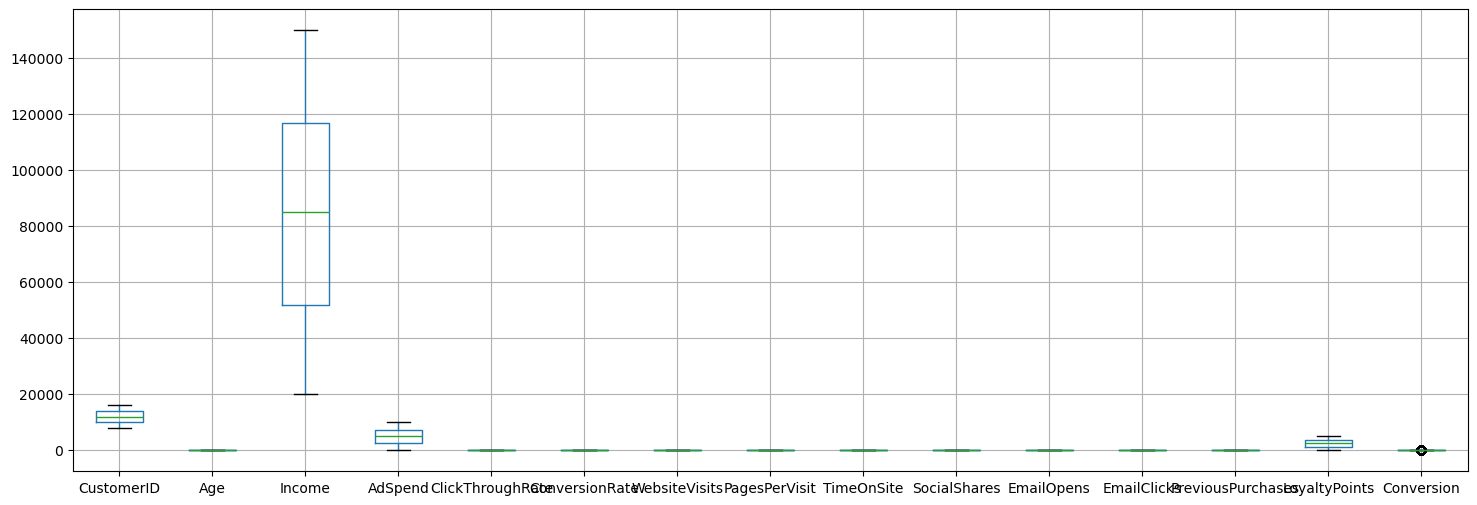

In [19]:
plt.figure(figsize =(18,6))
df.boxplot()
plt.show()

In [22]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Income', 'CampaignChannel',
       'CampaignType', 'AdSpend', 'ClickThroughRate', 'ConversionRate',
       'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares',
       'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints',
       'AdvertisingPlatform', 'AdvertisingTool', 'Conversion'],
      dtype='object')

## Univariete Analysis

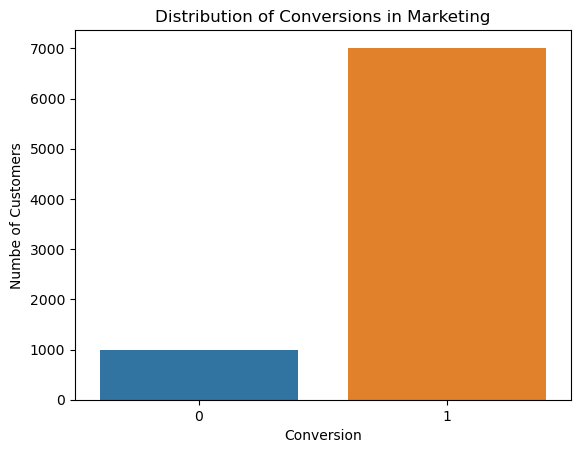

In [14]:
sns.countplot(data = df , x ='Conversion')
plt.xlabel('Conversion')
plt.ylabel('Numbe of Customers')
plt.title('Distribution of Conversions in Marketing')
plt.show()

The bar chart titled “Distribution of Conversions in Marketing” shows that a significantly higher number of customers converted (category ‘1’) compared to those who did not (category ‘0’). This indicates that the marketing campaigns are generally effective in driving conversions

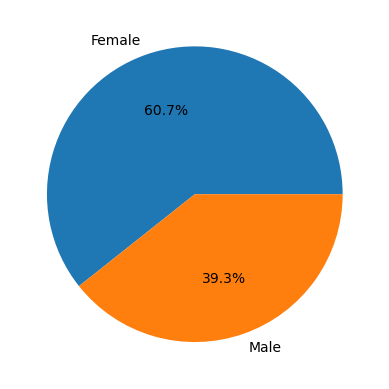

In [5]:
df.Gender.value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.ylabel('')
plt.show()

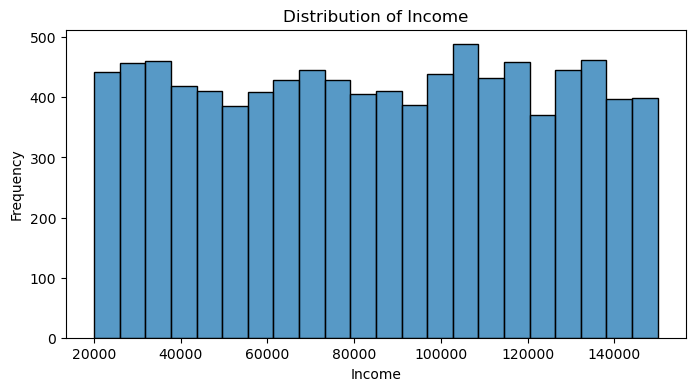

In [9]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Income'])
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

The histogram shows that  diverse income distribution among the customer base.

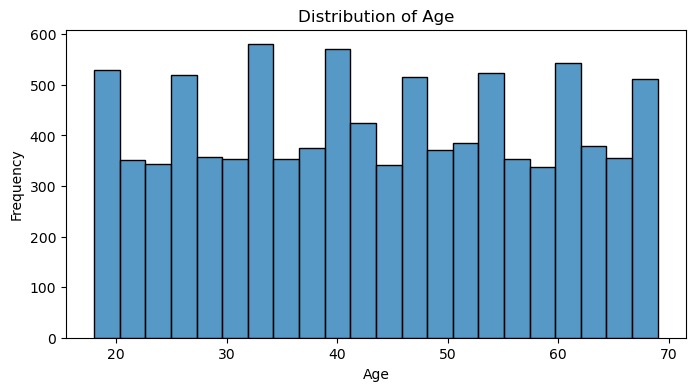

In [13]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Age'])
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [21]:
Total   =df.groupby('CampaignChannel')['CustomerID'].count().reset_index()
Total

,CampaignChannel,CustomerID
0,Email,1816
1,PPC,1944
2,Referral,1994
3,SEO,1837
4,Social Media,1785


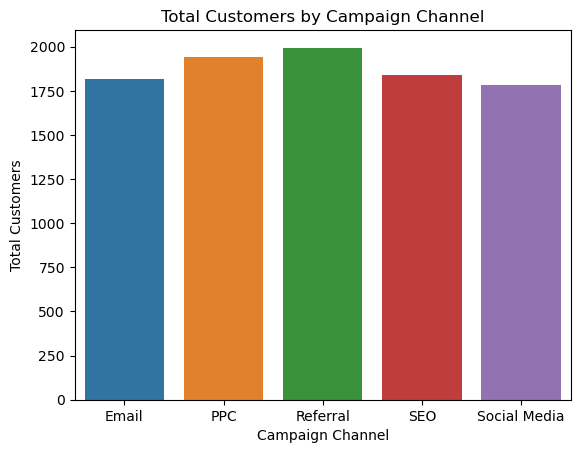

In [23]:
sns.barplot(data=Total, x='CampaignChannel',  y = "CustomerID")
plt.xlabel('Campaign Channel')
plt.ylabel('Total Customers')
plt.title('Total Customers by Campaign Channel')
plt.show()

The bar chart shows that Email and PPC channels have the highest number of customers, indicating these channels are the most effective in acquiring customers

## Conversion by CampaignChannel

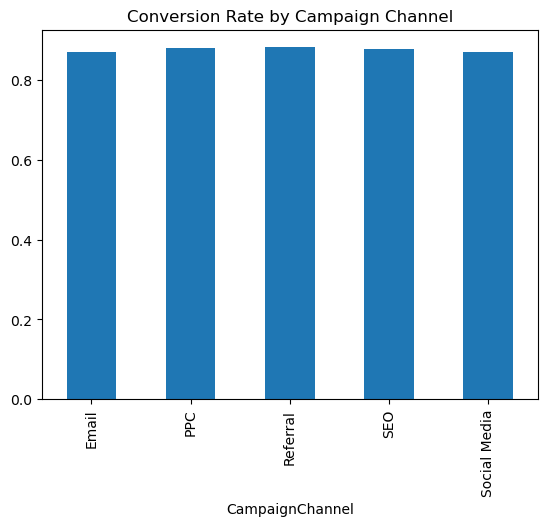

In [38]:
df.groupby('CampaignChannel')['Conversion'].mean().plot(kind='bar')
plt.title('Conversion Rate by Campaign Channel')
plt.show()


In [5]:
Total   =df.groupby('CampaignType')['CustomerID'].count().reset_index()
Total

,CampaignType,CustomerID
0,Awareness,2349
1,Consideration,2316
2,Conversion,2455
3,Retention,2256


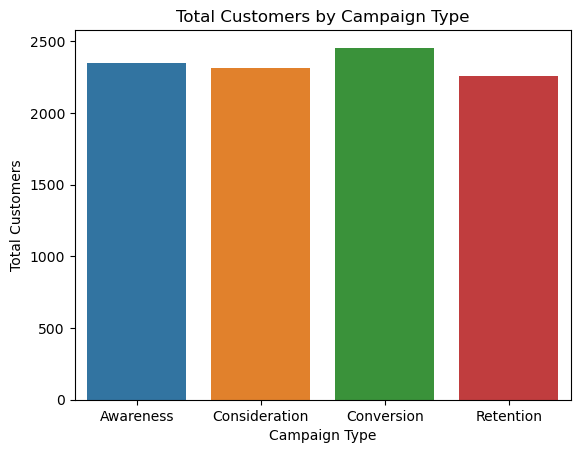

In [7]:
sns.barplot(data=Total, x='CampaignType',  y = "CustomerID")
plt.xlabel('Campaign Type')
plt.ylabel('Total Customers')
plt.title('Total Customers by Campaign Type')
plt.show()

The overall distribution of customers across different channels and campaign types is relatively similar

## Ad Spend vs Conversion Rate 

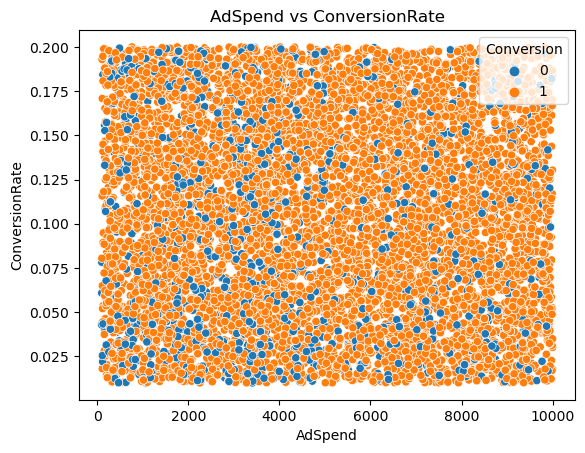

In [12]:
# Scatter plot for AdSpend vs ConversionRate
sns.scatterplot(data=df, x='AdSpend', y='ConversionRate',hue ='Conversion')
plt.title('AdSpend vs ConversionRate')
plt.show()


The scatter plot titled "AdSpend vs ConversionRate" visually represents the relationship between advertising spending and conversion rates. The blue and orange dots likely correspond to different conversion categories (0 and 1). There appears to be a slight clustering of data points in the higher AdSpend and ConversionRate ranges, suggesting a potential positive correlation

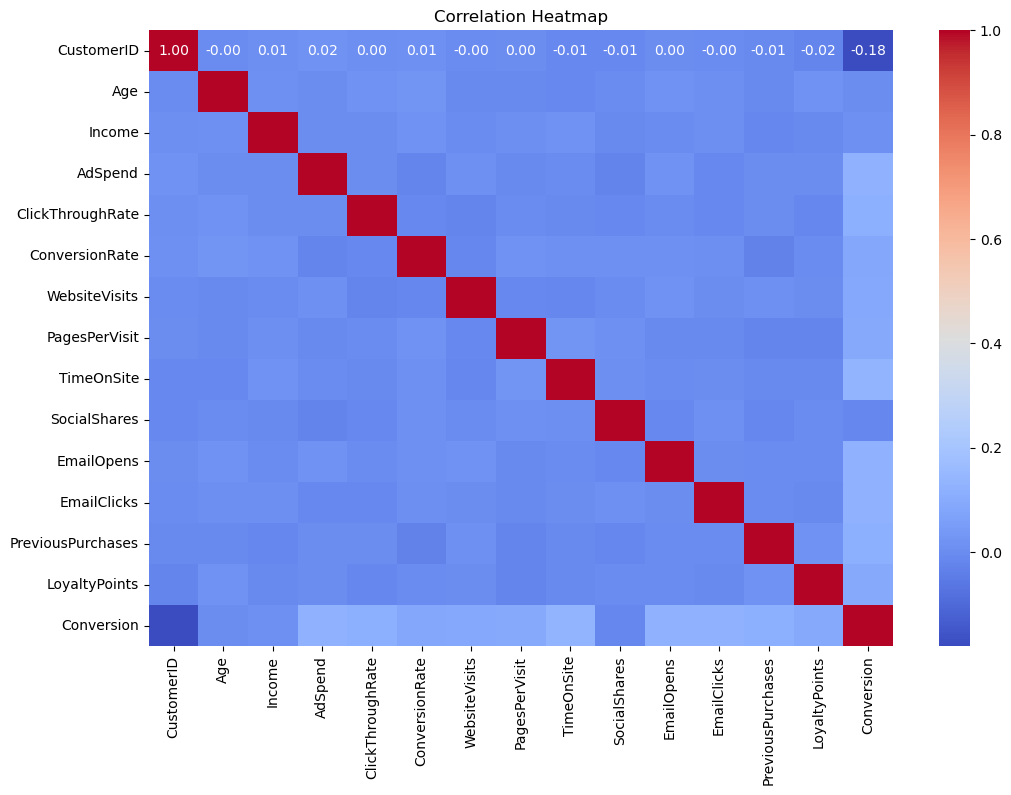

In [66]:
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## AdSpend by CampaignType and Conversion

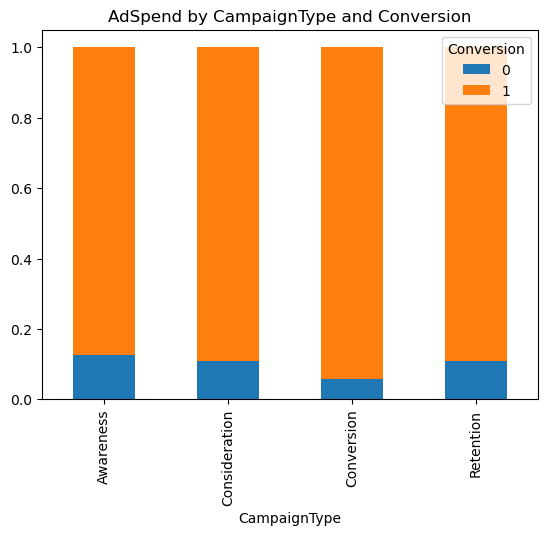

In [68]:
# Create a crosstab between CampaignType, Conversion, and AdSpend
crosstab = pd.crosstab(df['CampaignType'], df['Conversion'], values=df['AdSpend'], aggfunc='sum', normalize='index')

# Plot the stacked bar chart
crosstab.plot(kind='bar', stacked=True)
plt.title('AdSpend by CampaignType and Conversion')
plt.show()


 The chart suggests that while all campaign types have varying levels of ad spend, conversion campaigns generally have higher spending compared to other types.

##  Conclusion

The initial analysis reveals promising results for the marketing campaigns. A high conversion rate indicates overall effectiveness. While Referral and PPC channels stand out for customer acquisition. Analyzing correlations between variables and segmenting customers can provide deeper insights for refining marketing strategies.